# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mafki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1940'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Exemple de fichiers
files[:5]

['KB_JB838_1940-01-04_01-00001.txt',
 'KB_JB838_1940-01-05_01-00009.txt',
 'KB_JB838_1940-01-07_01-00014.txt',
 'KB_JB838_1940-01-10_01-00003.txt',
 'KB_JB838_1940-01-11_01-00004.txt']

In [7]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [8]:
# Exemple de textes
texts[0][:400]

"54 e ANNEE. — N° 4. Pages - 40 C 1 *® 8 Grand-Duché : 45 centimes. - France : 75 centime». ABONNEMENTS pour la province on Province } s'abonne à là Poste CH' Vüle au $ pour | T , oi , ŒOl# 28>50 BUREAUX ET FILS SPÉCIAUX: — — ■ ; S Un an 170.00 Congo • j Six mol , 85X0 Etranger : Prix euivant conventions VENTE ET ABONNEM. : PLACE DE LOUVAIN. 23 □ SALLE DE DÉPÊCHES : 124. RUE ROYALE BRUXELLES G “ ■“"

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [13]:
# Détail de la matrice
tfidf_vectors.shape

(1000, 4622)

### Imprimer le vecteur tf-IDF du premier document

In [15]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

gouvernement    0.158590
milieux         0.154867
cabinet         0.133415
neige           0.118099
politiques      0.117663
                  ...   
dépôts          0.000000
désigné         0.000000
désir           0.000000
désirent        0.000000
♦               0.000000
Length: 4622, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [16]:
cosine([1, 2, 3], [1, 2, 3])

0

In [17]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [18]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [19]:
tfidf_array = tfidf_vectors.toarray()

In [20]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
# Vecteur du document 1
tfidf_array[1]

array([0.00726886, 0.        , 0.        , ..., 0.00661771, 0.        ,
       0.        ])

In [22]:
cosine(tfidf_array[0], tfidf_array[1])

0.955203187969153

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [53]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [54]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [55]:
clusters = km_model.fit_predict(tfidf_vectors)

In [56]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [57]:
pprint(dict(clustering))

{0: ['KB_JB838_1940-01-04_01-00001.txt',
     'KB_JB838_1940-01-10_01-00003.txt',
     'KB_JB838_1940-01-11_01-00004.txt',
     'KB_JB838_1940-01-27_01-00004.txt',
     'KB_JB838_1940-01-31_01-00002.txt',
     'KB_JB838_1940-02-07_01-00004.txt',
     'KB_JB838_1940-02-25_01-00006.txt',
     'KB_JB838_1940-03-01_01-00003.txt',
     'KB_JB838_1940-03-03_01-00004.txt',
     'KB_JB838_1940-03-10_01-00003.txt',
     'KB_JB838_1940-03-31_01-00002.txt',
     'KB_JB838_1940-04-16_01-00003.txt',
     'KB_JB838_1940-04-19_01-00004.txt',
     'KB_JB838_1940-04-29_01-00001.txt',
     'KB_JB838_1940-05-02_01-00002.txt',
     'KB_JB838_1940-05-02_01-00004.txt',
     'KB_JB838_1940-06-21_01-00003.txt',
     'KB_JB838_1940-07-11_01-00001.txt',
     'KB_JB838_1940-07-16_01-00001.txt',
     'KB_JB838_1940-07-24_01-00001.txt',
     'KB_JB838_1940-08-03_01-00001.txt',
     'KB_JB838_1940-08-11_01-00002.txt',
     'KB_JB838_1940-08-29_01-00003.txt',
     'KB_JB838_1940-08-31_01-00002.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [58]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [59]:
reduced_vectors[:10]

array([[-0.26171399, -0.17126592],
       [ 0.61359419, -0.18345792],
       [ 0.12158449,  0.0757129 ],
       [-0.29838529, -0.28131333],
       [-0.26376631, -0.13242114],
       [-0.19551651,  0.15464158],
       [-0.28410338, -0.19461755],
       [-0.25093195, -0.14189943],
       [-0.11626459,  0.1466046 ],
       [ 0.45606967, -0.04279473]])

### Générer le plot

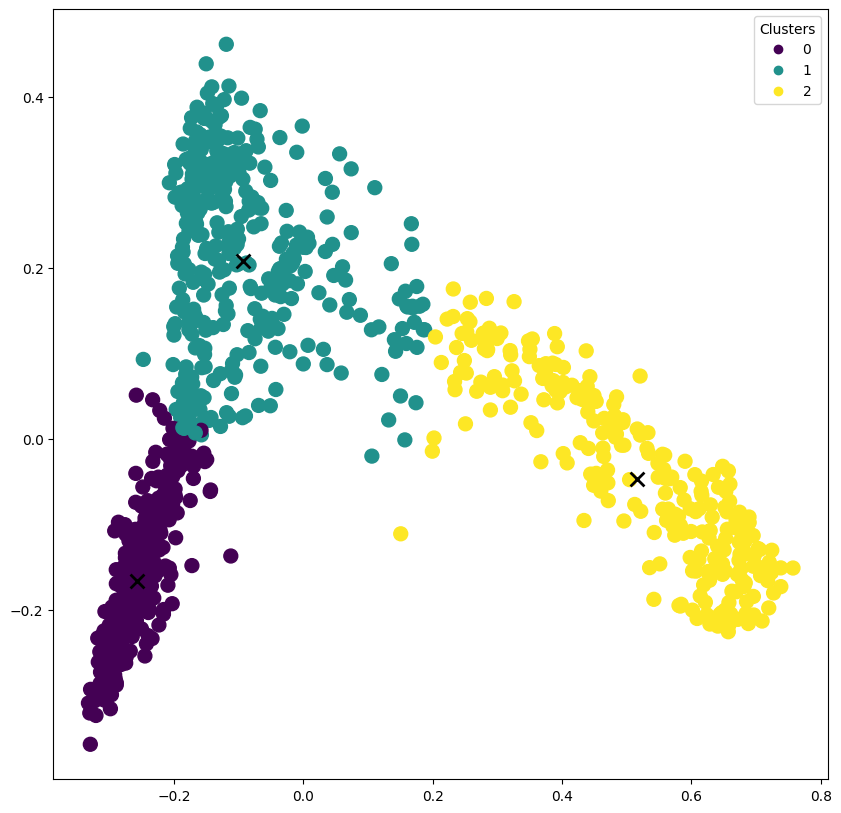

In [60]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")